## COMPSCI 371D Homework 2

## Part 1: Functions in Machine Learning

### Problem 1.1 (Exam-Style)

The set $X$ is the data space and it contains all of the possible $5 \times 5$ pixel squares that exists on the satelitte image. The set $Y$ is simply the labels $\{false, true\}$ (can also be represented by 0 and 1) which represents the vegetation status of the image input.

## Problem 1.2 (Exam-Style)

Classifer

### Problem 1.3 (Exam-Style)
$x \in V, y \in Y\{0,1\}, \hat{y} \in H$

$\frac{1}{N} \sum_{N}^{n}(y - \hat{y})^2$

### Problem 1.4 (Exam-Style)

## Part 2: The $L_1$ Loss

### Problem 2.1

### Problem 2.2 (Exam-Style)

### Problem 2.3 (Exam-Style)

### Problem 2.4 (Exam-Style)

### Problem 2.5 (Exam-Style)

### Problem 2.6

## Part 3: Intuition in Many Dimensions

In [3]:
from math import gamma, sqrt
import numpy as np


def gaussian_sample(n, d):
    mean = np.zeros(d)
    mean_distance = 2 * gamma((d + 1) / 2) / gamma(d / 2) if d < 200 else sqrt(2 * d)
    covariance = np.eye(d) / pow(mean_distance, 2)
    return np.random.multivariate_normal(mean, covariance, size=n)

In [4]:
from matplotlib import pyplot as plt


def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

### Problem 3.1

In [5]:
def distances(points):
    
    output = []
    
    for a in points:
        for b in points:
            if not np.array_equal(a,b):
                output.append(np.linalg.norm(a-b))
    return output

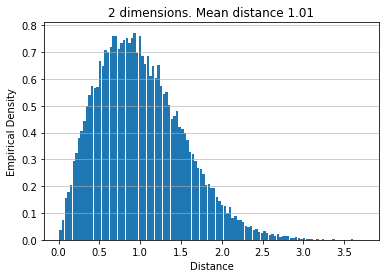

In [6]:
samp = gaussian_sample(300, 2)
dist = distances(samp)
show_histogram(dist, 2)

### Problem 3.2

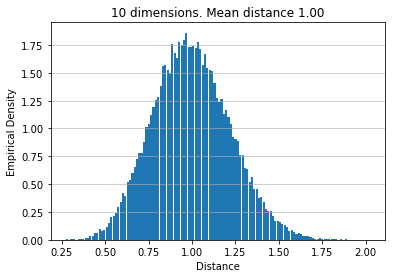

In [7]:
samp = gaussian_sample(300, 10)
dist = distances(samp)
show_histogram(dist, 10)

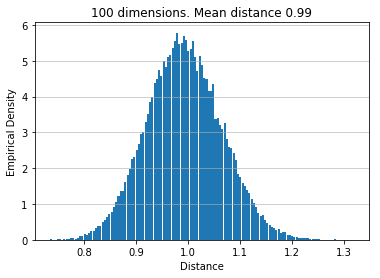

In [8]:
samp = gaussian_sample(300, 100)
dist = distances(samp)
show_histogram(dist, 100)

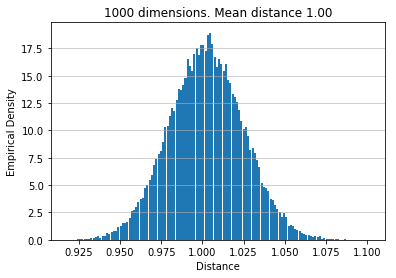

In [9]:
samp = gaussian_sample(300, 1000)
dist = distances(samp)
show_histogram(dist, 1000)

### Problem 3.3

Due to the curse of dimensionality, as degree increases, the distances between the points decreases. 

### Problem 3.4

With increased demonsionality, the distances between every point decreases until they are equal or nearly equivalant which makes it more likely for a 

## Part 4: Data Transformations

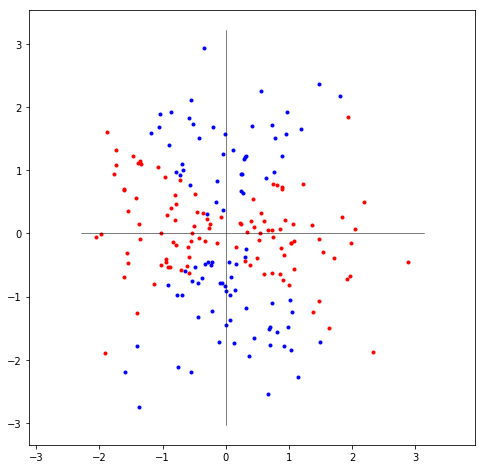

In [10]:
import pickle


file_name = 'data.p'
with open(file_name, 'rb') as file:
    data = pickle.load(file)
x, y = data['x'], data['y']

plt.figure(figsize=(8, 8))
positive = x[y > 0]
negative = x[y <= 0]
plt.plot(positive[:, 0], positive[:, 1], '.b')
plt.plot(negative[:, 0], negative[:, 1], '.r')
x_limits, y_limits = plt.xlim(), plt.ylim()
plt.plot(x_limits, [0, 0], 'k', linewidth=0.5)
plt.plot([0, 0], y_limits, 'k', linewidth=0.5)
plt.axis('equal')
plt.show()

### Problem 4.1

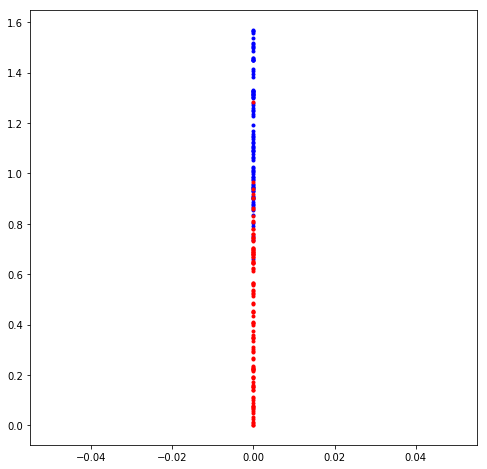

In [15]:
import pickle

def transform(x):
    return np.arctan(np.absolute(x[:, 1]/x[:, 0]))
    
file_name = 'data.p'
with open(file_name, 'rb') as file:
    data = pickle.load(file)
x, y = data['x'], data['y']
                     
z = transform(x)

plt.figure(figsize=(8, 8))
positive = z[y > 0]
negative = z[y <= 0]
plt.plot(np.zeros(positive.shape), positive[:], '.b')
plt.plot(np.zeros(negative.shape), negative[:], '.r')
plt.show()

### Problem 4.2

In [18]:

def h(z, threshold=0.0):
    y_hats = []
    for i in range(len(z)):
#         
        if z[i] > threshold:
            y_hats.append(1)
        else:
            y_hats.append(-1)
    return y_hats

def risk(y, y_hat):
    return np.sum(np.array(y).T - np.array(y_hat).T)

def find_threshold(z, y):
    t_history = findTs(z)
    r_history = findRs(t_history, z, y)
    
    best_t = []
    min_risk = []
    
    for i in range(len(z)):
        best_t.append(findBestT(z, y, t_history))
        
def findBestT(z, y, th):
    risks = []
    for t in th:
        risks.append(risk(y, h(z, t)))
    
    
def findRs(thrshld, z, y):
    output = []
    for t in thrshld:
        output.append(risk(y, h(z, t)))
    return output

def findTs(z):
    output = []
    for i in range(len(z)):
        t = (z[i] + z[i+1])/2
        output.append(t)
    return output
    
        

(200,)
